In [1]:
import numpy as np
import cv2
import AAM
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

from tqdm import *

In [2]:
def display_animation(person):
    pred_imgs = []
    for b in tqdm(person.lowdim_b):
        pred_imgs.append(person.reconstruct_face(b))
    lowdim_b = person.lowdim_b
    FRAME_LEN = len(lowdim_b)
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure(figsize=(12, 9))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)
    pic = ax1.imshow(cv2.cvtColor(pred_imgs[0], cv2.COLOR_BGR2RGB))

    for idx, b in enumerate(lowdim_b):
        ax2.annotate(str(idx), (idx, b[0]))
        ax3.annotate(str(idx), (idx, b[1]))
        ax4.annotate(str(idx), (idx, b[2]))

    ax2.plot(np.arange(len(lowdim_b)), lowdim_b[:, 0])
    indicator1 = ax2.scatter([], [], s=150)
    ax3.plot(np.arange(len(lowdim_b)), lowdim_b[:, 1])
    indicator2 = ax3.scatter([], [], s=150)
    ax4.plot(np.arange(len(lowdim_b)), lowdim_b[:, 2])
    indicator3 = ax4.scatter([], [], s=150)

    plt.close() # don't show initial face

    def init():

        return []

    # animation function. This is called sequentially
    def animate(i):
        pic.set_data(cv2.cvtColor(pred_imgs[i], cv2.COLOR_BGR2RGB))
        indicator1.set_offsets(np.c_[[i], [lowdim_b[i, 0]]])
        indicator2.set_offsets(np.c_[[i], [lowdim_b[i, 1]]])
        indicator3.set_offsets(np.c_[[i], [lowdim_b[i, 2]]])
        return []

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAME_LEN, interval=120, blit=True)
    return HTML(anim.to_html5_video())

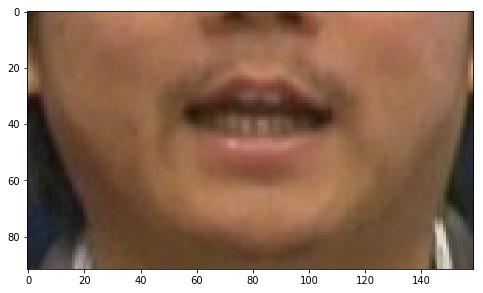

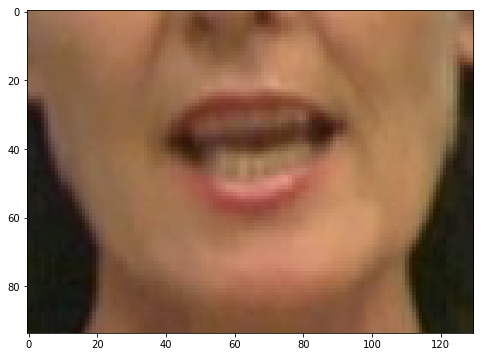

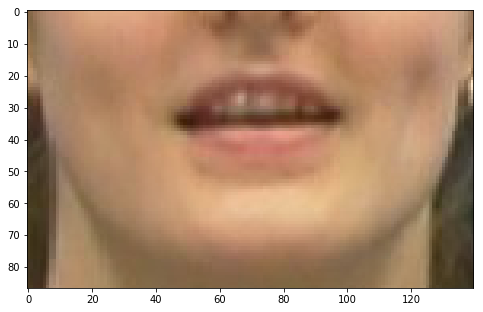

In [3]:
man = AAM.AAM('data/mabw0_sa1/', 35, 101)
AAM.display_face(man.REF_FACE_IMG)
woman = AAM.AAM('data/sa1/', 27, 119)
AAM.display_face(woman.REF_FACE_IMG)
w2 = AAM.AAM('data/fdms0_sa1/', 20, 115)
AAM.display_face(w2.REF_FACE_IMG)

In [4]:
man.fit()
woman.fit()
w2.fit()

100%|██████████| 115/115 [00:53<00:00,  2.15it/s]


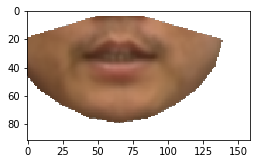

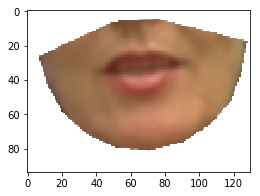

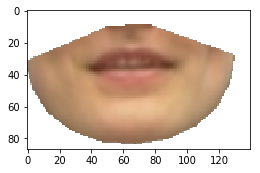

In [5]:
test = man.reconstruct_face(np.zeros(16))
AAM.display_face(test, figsize=(4, 3))

test = woman.reconstruct_face(np.zeros(16))
AAM.display_face(test, figsize=(4, 3))

test = w2.reconstruct_face(np.zeros(16))
AAM.display_face(test, figsize=(4, 3))

In [6]:
display_animation(man)

100%|██████████| 101/101 [01:01<00:00,  1.65it/s]


In [7]:
display_animation(woman)

100%|██████████| 119/119 [01:01<00:00,  1.95it/s]


In [8]:
display_animation(w2)

100%|██████████| 115/115 [00:58<00:00,  1.97it/s]
